In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=15) #size=1500
lngs = np.random.uniform(lng_range[0], lng_range[1], size=15) #size=1500
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

15


In [3]:
#create data frame and add empty columns
weather_df = pd.DataFrame({'City':cities})
weather_df['Lat'] = ""
weather_df['Lng'] = ""
weather_df['MaxTemp'] = ""
weather_df['Humidity'] = ""
weather_df['Cloudiness'] = ""
weather_df['WindSpeed'] = ""
weather_df['Country'] = ""
weather_df['Date'] = ""


In [4]:
# Set units to imperial
units = 'imperial'

# Iterate over the rows in the df and fill the columns
print("Beginning data retrieval")
print("-------------------------")
for index, row in weather_df.iterrows():
    base_url = "https://api.openweathermap.org/data/2.5/weather?" 

    city = row['City']
    
    target_url = f"{base_url}q={city}&appid={weather_api_key}&units={units}"
    
    response = requests.get(target_url).json() 

    time.sleep(1)
    
    try:
        print(f"Processing record {index}|{city}")
        
        weather_df.loc[index,'Lat'] = response['coord']['lat']
        weather_df.loc[index,'Lng'] = response['coord']['lon']
        weather_df.loc[index,'MaxTemp'] = response['main']['temp_max']
        weather_df.loc[index,'Humidity'] = response['main']['humidity']
        weather_df.loc[index,'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index,'WindSpeed'] = response['wind']['speed']
        weather_df.loc[index,'Country'] = response['sys']['country']
        weather_df.loc[index,'Date'] = response['dt']
        
    except:
    
        print(f"{city} not found. Skipping...")
    
weather_df

Beginning data retrieval
-------------------------
Processing record 0|busselton
Processing record 1|castro
Processing record 2|butaritari
Processing record 3|skjervoy
Processing record 4|berlevag
Processing record 5|marand
Processing record 6|albany
Processing record 7|krasnovishersk
Processing record 8|thunder bay
Processing record 9|balikpapan
Processing record 10|jamestown
Processing record 11|kapaa
Processing record 12|khatanga
Processing record 13|namatanai
Processing record 14|punta arenas


,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
0,busselton,-33.65,115.333,57,96,7,5.64,AU,1612800652
1,castro,-24.7911,-50.0119,74.95,51,0,4.65,BR,1612800525
2,butaritari,3.0707,172.79,81.43,81,97,18.59,KI,1612800665
3,skjervoy,70.0311,20.9714,24.8,58,40,6.91,NO,1612801219
4,berlevag,70.8578,29.0864,21.2,79,40,12.66,NO,1612800661
5,marand,38.4329,45.7749,44.6,81,8,3.24,IR,1612801222
6,albany,42.6001,-73.9662,21.99,46,94,3,US,1612800385
7,krasnovishersk,60.4078,57.082,-14.87,87,100,6.31,RU,1612801225
8,thunder bay,48.4001,-89.3168,-11.99,57,1,9.22,CA,1612800631
9,balikpapan,-1.2675,116.829,76.77,88,95,1.77,ID,1612801228


In [5]:
weather_df = weather_df.dropna()

In [6]:
# Save DataFrame to csv file
weather_df.to_csv(output_data_file)

# Display DataFrame
weather_df

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
0,busselton,-33.65,115.333,57,96,7,5.64,AU,1612800652
1,castro,-24.7911,-50.0119,74.95,51,0,4.65,BR,1612800525
2,butaritari,3.0707,172.79,81.43,81,97,18.59,KI,1612800665
3,skjervoy,70.0311,20.9714,24.8,58,40,6.91,NO,1612801219
4,berlevag,70.8578,29.0864,21.2,79,40,12.66,NO,1612800661
5,marand,38.4329,45.7749,44.6,81,8,3.24,IR,1612801222
6,albany,42.6001,-73.9662,21.99,46,94,3,US,1612800385
7,krasnovishersk,60.4078,57.082,-14.87,87,100,6.31,RU,1612801225
8,thunder bay,48.4001,-89.3168,-11.99,57,1,9.22,CA,1612800631
9,balikpapan,-1.2675,116.829,76.77,88,95,1.77,ID,1612801228


In [7]:
# Convert to floats
weather_df.loc[:,"Lat"] = weather_df["Lat"].astype('float')
weather_df.loc[:,"Lng"] = weather_df["Lng"].astype('float')
weather_df.loc[:,"MaxTemp"] = weather_df["MaxTemp"].astype('float')
weather_df.loc[:,"Humidity"] = weather_df["Humidity"].astype('float')
weather_df.loc[:,"Cloudiness"] = weather_df["Cloudiness"].astype('float')
weather_df.loc[:,"WindSpeed"] = weather_df["WindSpeed"].astype('float')
weather_df.loc[:,"Date"] = weather_df["Date"].astype('float')


In [ ]:
# Remove cities where humidity is more than 100%
weather_df = weather_df.loc[weather_df['Humidity'] <= 100]

In [8]:
summary_stats = weather_df[['Lat','Lng','MaxTemp','Humidity','Cloudiness','WindSpeed','Date']]
summary_stats.describe(include='all')

,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Date
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01
mean,23.560940,19.335633,39.337333,71.733333,50.800000,8.602667,1.612801e+09
std,40.458925,101.496138,36.258436,17.185819,44.780736,5.921993,3.284184e+02
min,-53.150000,-159.319000,-19.800000,40.000000,0.000000,1.770000,1.612800e+09
25%,-2.467100,-72.441450,20.100000,57.500000,4.000000,5.145000,1.612801e+09
50%,38.432900,29.086400,44.600000,81.000000,40.000000,6.620000,1.612801e+09
75%,54.403950,108.916650,73.275000,82.000000,94.500000,10.830000,1.612801e+09
max,71.966700,172.790200,81.430000,96.000000,100.000000,23.020000,1.612801e+09


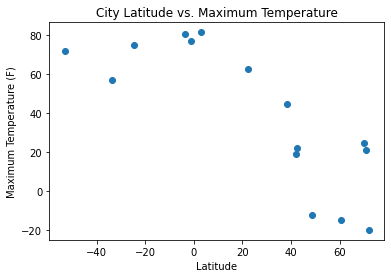

In [39]:
# Latitude vs Max Temp
plt.scatter(weather_df['Lat'], weather_df['MaxTemp'])
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('City Latitude vs. Maximum Temperature')
plt.show()

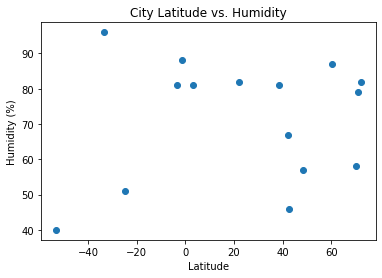

In [40]:
# Latitude vs. Humidity
plt.scatter(weather_df['Lat'], weather_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.show()

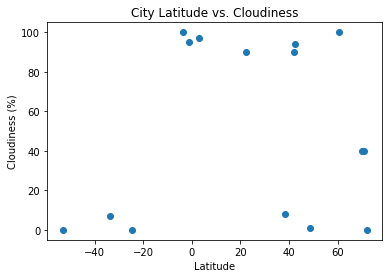

In [41]:
# Latitude vs. Cloudiness
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.show()

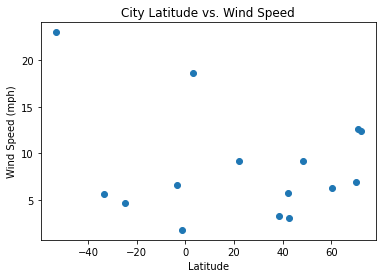

In [16]:
# Latitude vs. Wind Speed
plt.scatter(weather_df['Lat'], weather_df['WindSpeed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')
plt.show()

In [63]:
# Group DataFrame into northern and southern hemispheres
northern_hem = weather_df.loc[weather_df['Lat'] > 0]
southern_hem = weather_df.loc[weather_df['Lat'] < 0]
southern_hem.head()

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
0,busselton,-33.6500,115.3333,57.00,96.0,7.0,5.64,AU,1.612801e+09
1,castro,-24.7911,-50.0119,74.95,51.0,0.0,4.65,BR,1.612801e+09
9,balikpapan,-1.2675,116.8289,76.77,88.0,95.0,1.77,ID,1.612801e+09
13,namatanai,-3.6667,152.4333,80.78,81.0,100.0,6.62,PG,1.612801e+09
14,punta arenas,-53.1500,-70.9167,71.60,40.0,0.0,23.02,CL,1.612801e+09


The r-value is -0.7914291114599716.


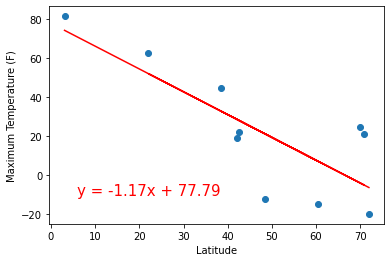

In [66]:
# Latitude vs Max Temp, northern hemisphere

# Add the linear regression equation and line to plot
x_values = northern_hem['Lat']
y_values = northern_hem['MaxTemp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.show()

The r-value is 0.5573532026744576.


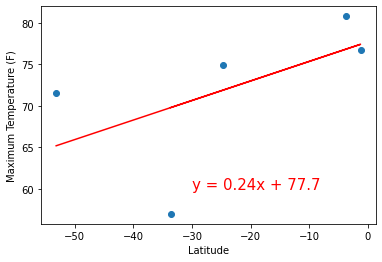

In [67]:
# Latitude vs Max Temp, southern hemisphere

# Add the linear regression equation and line to plot
x_values = southern_hem['Lat']
y_values = southern_hem['MaxTemp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.show()

The r-value is -0.1087927424814871.


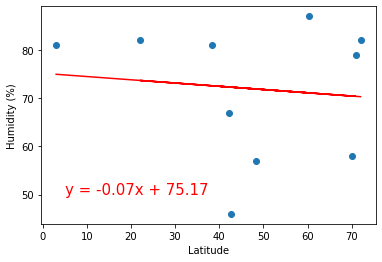

In [68]:
# Latitude vs. Humidity, northern hemisphere

# Add the linear regression equation and line to plot
x_values = northern_hem['Lat']
y_values = northern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

The r-value is 0.6011771725544187.


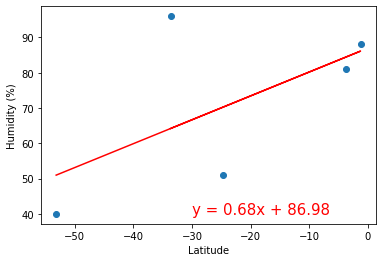

In [69]:
# Latitude vs. Humidity, southern hemisphere

# Add the linear regression equation and line to plot
x_values = southern_hem['Lat']
y_values = southern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

The r-value is -0.48651824111768943.


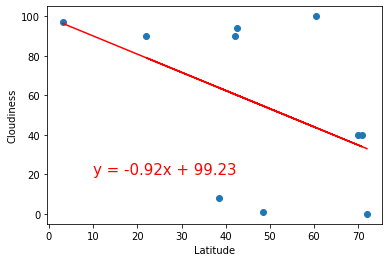

In [70]:
# Latitude vs. Cloudiness, northern hemishphere

# Add the linear regression equation and line to plot
x_values = northern_hem['Lat']
y_values = northern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is 0.8818270159914531.


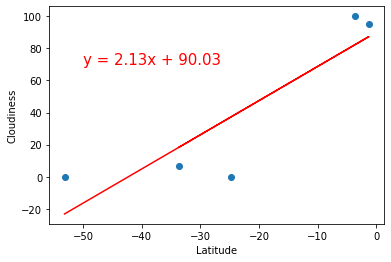

In [71]:
# Latitude vs. Cloudiness, southern hemisphere

# Add the linear regression equation and line to plot
x_values = southern_hem['Lat']
y_values = southern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is -0.25207339832190223.


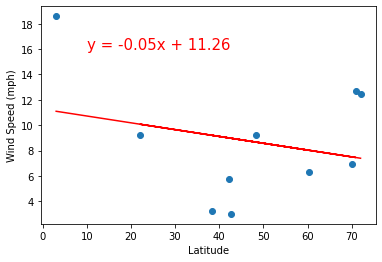

In [72]:
# Latitude vs. Wind Speed, northern hemisphere

# Add the linear regression equation and line to plot
x_values = northern_hem['Lat']
y_values = northern_hem['WindSpeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,16),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

The r-value is -0.8021783665992613.


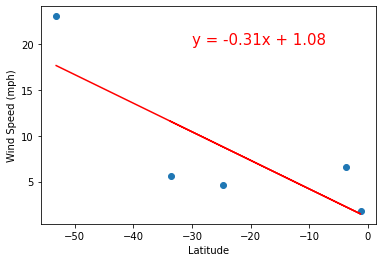

In [73]:
# Latitude vs. Wind Speed, southern hemisphere

# Add the linear regression equation and line to plot
x_values = southern_hem['Lat']
y_values = southern_hem['WindSpeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()